<a href="https://www.kaggle.com/code/andymejia/credit-card-fraud-0?scriptVersionId=146469451" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
raw_df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv').drop('Time', axis=1)
raw_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
raw_df.keys()

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [5]:
print(raw_df.shape)

(284807, 30)


In [6]:
missing_values = raw_df.isnull().sum()
print(missing_values)

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


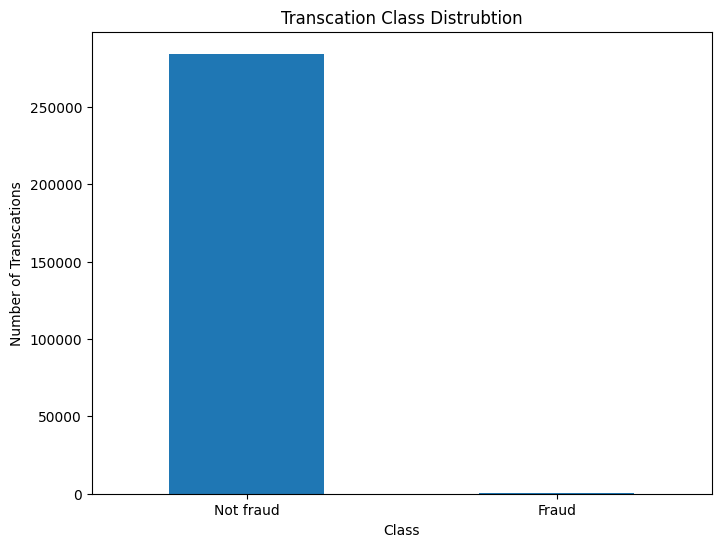

In [7]:
fraud_counts = raw_df['Class'].value_counts()

plt.figure(figsize=(8,6))
fraud_counts.plot(kind='bar', rot=0)
plt.title('Transcation Class Distrubtion')
plt.xticks([0,1], ['Not fraud', "Fraud"])
plt.ylabel('Number of Transcations')
plt.show()

In [8]:
fraud_counts = raw_df['Class'].value_counts()
print(fraud_counts)

Class
0    284315
1       492
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_20/2227708917.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

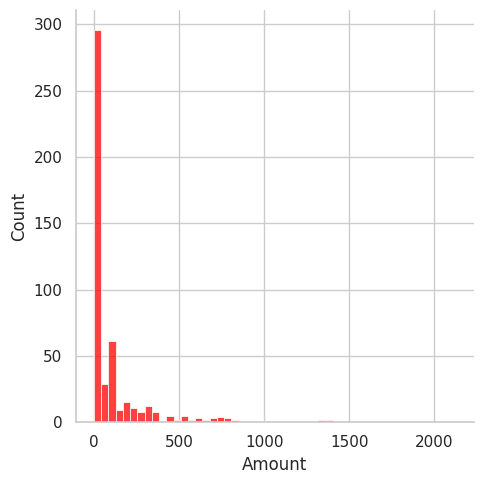

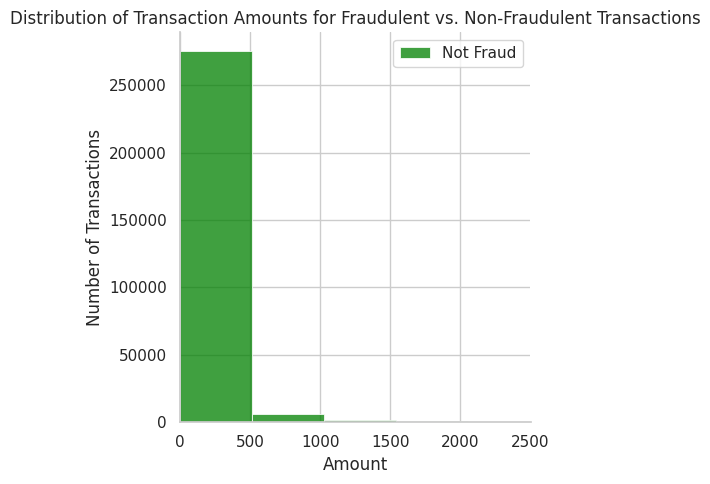

In [9]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the distribution of the 'Amount' for fraudulent transactions
sns.displot(raw_df[raw_df['Class'] == 1]['Amount'], bins=50, label='Fraud', kde=False, color='red')

# Plot the distribution of the 'Amount' for non-fraudulent transactions
sns.displot(raw_df[raw_df['Class'] == 0]['Amount'], bins=50, label='Not Fraud', kde=False, color='green')

plt.title('Distribution of Transaction Amounts for Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.legend()
plt.xlim([0, 2500])  # Limiting x-axis to 2500 for better visualization, as there might be some outliers
plt.tight_layout()
plt.show()

In [10]:
#Scale Amount
scaler = StandardScaler()
raw_df['scaled_amount'] = scaler.fit_transform(raw_df['Amount'].values.reshape(-1,1))

#SDrop the orginal 'Amount'
raw_df = raw_df.drop(['Amount'], axis=1)

In [11]:
X = raw_df.drop('Class', axis=1)
y = raw_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a RandomForestClassifier
#n_estimator = number of tree you want to built before the max voting or average predictions.
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Get feature importances
importances = rf.feature_importances_

# Convert the importances into a pandas dataframe
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the dataframe by importance
sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)

print(sorted_features)

          Feature  Importance
9             V10    0.149136
13            V14    0.132004
3              V4    0.121022
11            V12    0.104890
10            V11    0.103204
16            V17    0.058119
15            V16    0.054669
6              V7    0.047408
2              V3    0.035105
1              V2    0.021280
20            V21    0.015498
17            V18    0.013456
7              V8    0.013340
4              V5    0.013064
8              V9    0.012069
26            V27    0.010996
18            V19    0.010118
28  scaled_amount    0.009823
0              V1    0.009722
25            V26    0.008273
5              V6    0.008177
19            V20    0.007204
27            V28    0.007124
12            V13    0.007001
14            V15    0.006982
24            V25    0.005477
22            V23    0.005462
23            V24    0.005196
21            V22    0.004180


In [14]:
top_features = sorted_features['Feature'].head(10).tolist()

In [15]:
# Update the training dataset to only include important features
X_train_selected = X_train_smote[top_features]
X_test_selected = X_test[top_features]

# Train the model
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train_smote)

# Predict using the test dataset
y_pred = rf_selected.predict(X_test_selected)

# Evaluate the model (you can use metrics like precision, recall, f1-score, etc.)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.89      0.82        98

    accuracy                           1.00     56962
   macro avg       0.88      0.94      0.91     56962
weighted avg       1.00      1.00      1.00     56962

